In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [6]:
if os.path.isfile("ACT_Selected_Cancer_incidence_and_mortality.csv"):
    filepath = "ACT_Selected_Cancer_incidence_and_mortality.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/Health/ACT-Selected-Cancer-incidence-and-mortality/a2ku-4dqc"
    print("loading from the internet")

cancer_data = pd.read_csv(filepath)
print("done")

loading from file
done


Cancer Incidences and Mortalities in ACT 1985 - 2017 INTROCUTION / aim and purpose, questions i will look into

INTRODUCTION TO THE DATA

In [7]:
cancer_data.head()

,CancerType,IncidenceMortality,year,sex,NumberOfCases,AgeAdjustedRate,IncidenceMortality_Sex
0,Bowel C18-C20,Incidence,1985,Male,50,79.9,Incidence Male
1,Bowel C18-C20,Incidence,1986,Male,29,48.8,Incidence Male
2,Bowel C18-C20,Incidence,1987,Male,52,78.3,Incidence Male
3,Bowel C18-C20,Incidence,1988,Male,48,63.7,Incidence Male
4,Bowel C18-C20,Incidence,1989,Male,53,74.2,Incidence Male


fisrt scatter plot

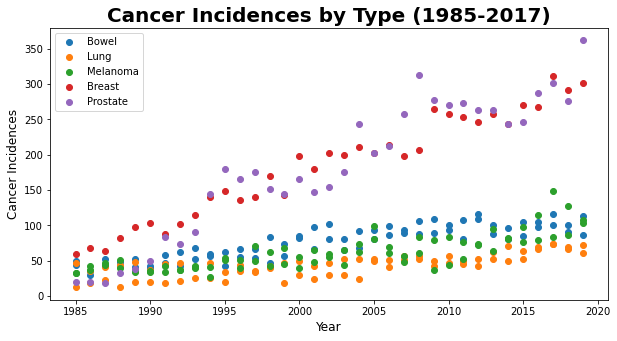

In [78]:
#removing the sex labelled as 'person' to decrease data ambiguity
cancer_male_female = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male', 'Incidence Female'])]

#removing cancer from 'All sites' again to decrease ambiguity
cancer_incidences = cancer_male_female[cancer_male_female["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#plotting bowel cancer
bowel = cancer_incidences[cancer_incidences["CancerType"].isin(["Bowel C18-C20"])]
lung = cancer_incidences[cancer_incidences["CancerType"].isin(["Lung C33, C34"])]
melanoma = cancer_incidences[cancer_incidences["CancerType"].isin(["Melanoma of skin C43"])]
breast = cancer_incidences[cancer_incidences["CancerType"].isin(["Breast C50"])]
prostate = cancer_incidences[cancer_incidences["CancerType"].isin(["Prostate C61"])]
#bowel.plot.scatter(x='year', y='NumberOfCases', c='red', label = 'Bowel')

#lung.plot.scatter(x='year', y='NumberOfCases', c='blue', label = 'Lung')
#plt.xlabel('Year')
#plt.ylabel('Cancer Incidences')

plt.scatter(bowel.year, bowel.NumberOfCases)
plt.scatter(lung.year, lung.NumberOfCases)
plt.scatter(melanoma.year, melanoma.NumberOfCases)
plt.scatter(breast.year, breast.NumberOfCases)
plt.scatter(prostate.year, prostate.NumberOfCases)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Cancer Incidences', fontsize = 12)
plt.title('Cancer Incidences by Type (1985-2017)', fontsize = 20, fontweight = "bold")
plt.legend(['Bowel', 'Lung', 'Melanoma', 'Breast', 'Prostate'])


gender

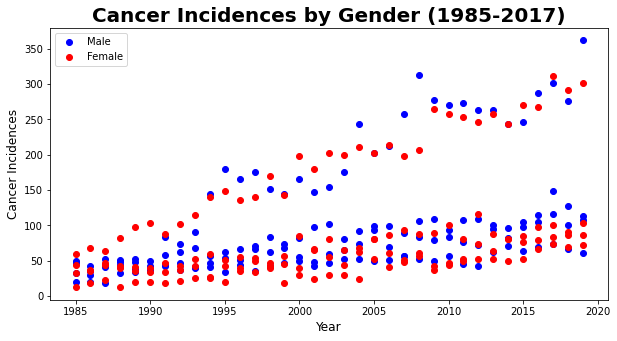

In [77]:
#separating male incidences and 'All Sites'
cancer_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male'])]
cancer_male = cancer_allmale[cancer_allmale["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#separating female incidences and 'All Sites'
cancer_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Female'])]
cancer_female = cancer_allfemale[cancer_allfemale["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

plt.scatter(cancer_male.year, cancer_male.NumberOfCases, c="Blue")
plt.scatter(cancer_female.year, cancer_female.NumberOfCases, c="Red")
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Cancer Incidences', fontsize = 12)
plt.title('Cancer Incidences by Gender (1985-2017)', fontsize = 20, fontweight = "bold")
plt.legend(['Male', 'Female'])

total bar graph for better visualisation

Text(0.5, 1.0, 'Total Cancer Incidences by Gender (1985-2017)')

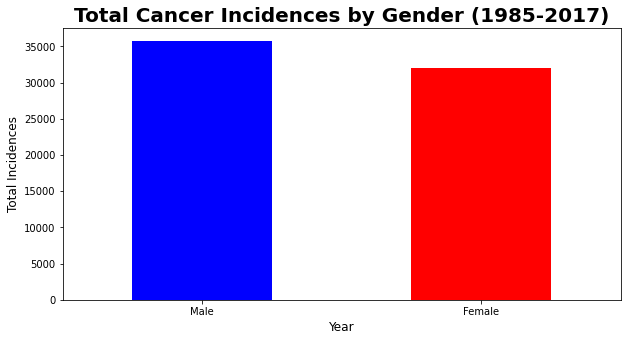

In [80]:
#adding male incidences
cancer_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male'])]
cancer_malesum = cancer_allmale['NumberOfCases'].sum()

#adding female incidences
cancer_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Female'])]
cancer_femalesum = cancer_allfemale['NumberOfCases'].sum()

#making the bar graph
bar_data = {"Gender":["Male", "Female"],
        "Total Incidences":[cancer_malesum, cancer_femalesum]}

dataFrame = pd.DataFrame(data=bar_data)

dataFrame.plot.bar(x="Gender", y="Total Incidences", rot=0, color=("Blue", "Red"), legend=False)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Incidences', fontsize = 12)
plt.title('Total Cancer Incidences by Gender (1985-2017)', fontsize = 20, fontweight = "bold")

Text(0.5, 1.0, 'Total Cancer Incidences by Type (1985-2017)')

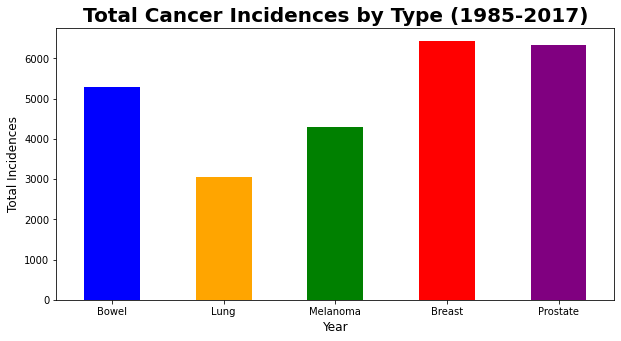

In [82]:
#creating sums of cancer types
bowel_sum = bowel["NumberOfCases"].sum()
lung_sum = lung["NumberOfCases"].sum()
melanoma_sum = melanoma["NumberOfCases"].sum()
breast_sum = breast["NumberOfCases"].sum()
prostate_sum = prostate["NumberOfCases"].sum()

#making the bar graph
bar_data = {"Cancer Type":["Bowel","Lung","Melanoma","Breast","Prostate"],
        "Total Incidences":[bowel_sum, lung_sum, melanoma_sum, breast_sum, prostate_sum]}

dataFrame = pd.DataFrame(data=bar_data)

dataFrame.plot.bar(x="Cancer Type", y="Total Incidences", rot=0, color=("Blue", "Orange", "Green", "Red", "Purple"), legend=False)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Incidences', fontsize = 12)
plt.title('Total Cancer Incidences by Type (1985-2017)', fontsize = 20, fontweight = "bold")

In [91]:
#separated by type and gender
bowel_male = bowel[bowel['sex'].isin(['Male'])].sum()
bowel_female = bowel[bowel['sex'].isin(['Female'])].sum()

#print(bowel_male)
#print(bowel_female)
#creating sums of cancer types
bowel_sum = bowel["NumberOfCases"].sum()
lung_sum = lung["NumberOfCases"].sum()
melanoma_sum = melanoma["NumberOfCases"].sum()
breast_sum = breast["NumberOfCases"].sum()
prostate_sum = prostate["NumberOfCases"].sum()

#making the bar graph
bar_data = {"Cancer Type":["Bowel","Lung","Melanoma","Breast","Prostate"],
        "Total Incidences":[bowel_male, bowel_female]}

dataFrame = pd.DataFrame(data=bar_data)

dataFrame.plot.bar(x="Cancer Type", y="Total Incidences", rot=0, color=("Blue", "Orange", "Green", "Red", "Purple"), legend=False)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Incidences', fontsize = 12)
plt.title('Total Cancer Incidences by Type (1985-2017)', fontsize = 20, fontweight = "bold")

ValueError: All arrays must be of the same length